In [1]:
from google.colab import files
uploaded = files.upload()


Saving Hackathon_Working_Data.csv to Hackathon_Working_Data (1).csv


In [2]:
import pandas as pd
# Load the CSV files into DataFrames

working_data = pd.read_csv('Hackathon_Working_Data.csv')


In [3]:
print(working_data.head())
print(working_data.tail())


  MONTH STORECODE  DAY BILL_ID  BILL_AMT  QTY  VALUE  PRICE  \
0    M1        N1    4    T375     225.0  1.0  225.0  225.0   
1    M1        N1    4    T379      95.0  1.0   95.0   95.0   
2    M1        N1    4    T381      10.0  1.0   10.0   10.0   
3    M1        N1    4    T382     108.0  1.0  108.0  108.0   
4    M1        N1    4    T384      19.0  1.0   19.0   19.0   

                       GRP                     SGRP                    SSGRP  \
0     BUTTER MARGR  (4/94)                   BUTTER                   SALTED   
1  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS  CONFECTIONERY - ECLAIRS   
2                CHOCOLATE         CHOCOLATE PANNED         CHOCOLATE PANNED   
3             PACKAGED TEA               MAIN PACKS               MAIN PACKS   
4         ALL IODISED SALT            POWDERED SALT            POWDERED SALT   

                      CMP           MBRD                 BRD  
0               G C M M F           AMUL                AMUL  
1             

In [4]:
num_rows = len(working_data)
print(f"Number of rows: {num_rows}")


Number of rows: 26985


In [5]:
print(working_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB
None


In [6]:
unique_counts = working_data.nunique()
print(unique_counts)

MONTH           3
STORECODE      10
DAY            31
BILL_ID      6424
BILL_AMT     1453
QTY            45
VALUE         640
PRICE         492
GRP            80
SGRP          174
SSGRP         232
CMP           354
MBRD          643
BRD          1315
dtype: int64


In [7]:
import pandas as pd

# Define the desired order for store codes
desired_order = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10']

# Group by MONTH and STORECODE, then count unique DAYS
store_days_count = working_data.groupby(['MONTH', 'STORECODE'])['DAY'].nunique().reset_index()
store_days_count.rename(columns={'DAY': 'NUM_DAYS'}, inplace=True)

# Convert STORECODE to categorical with the desired order
store_days_count['STORECODE'] = pd.Categorical(store_days_count['STORECODE'], categories=desired_order, ordered=True)
store_days_count = store_days_count.sort_values(['STORECODE', 'MONTH'])

# Print the results in the desired order
for store in desired_order:
    print(f"{store}")
    store_data = store_days_count[store_days_count['STORECODE'] == store]

    for _, row in store_data.iterrows():
        print(f"  {row['MONTH']}: {row['NUM_DAYS']}")
    print()  # Add a blank line between stores


N1
  M1: 21
  M2: 21
  M3: 26

N2
  M1: 23
  M2: 20
  M3: 18

N3
  M1: 21
  M2: 23
  M3: 20

N4
  M1: 19
  M2: 24
  M3: 28

N5
  M1: 22
  M2: 22
  M3: 24

N6
  M1: 19
  M2: 21
  M3: 22

N7
  M1: 21
  M2: 26
  M3: 21

N8
  M1: 24
  M2: 20
  M3: 25

N9
  M1: 23
  M2: 20
  M3: 14

N10
  M1: 27
  M2: 22
  M3: 26



In [8]:
!pip install matplotlib seaborn

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

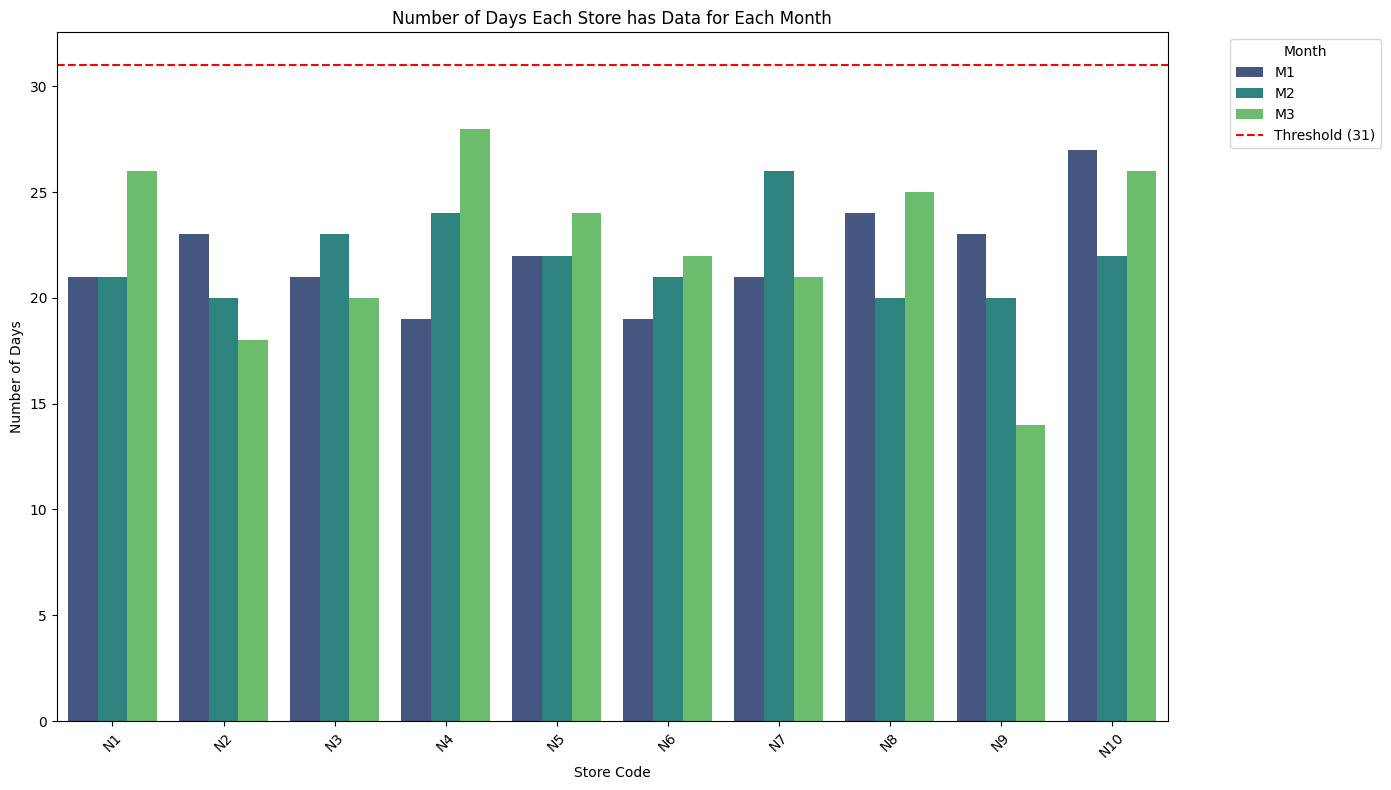

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
pivot_data = store_days_count.pivot_table(index='STORECODE', columns='MONTH', values='NUM_DAYS', fill_value=0)
pivot_data = pivot_data.reset_index()
melted_data = pivot_data.melt(id_vars='STORECODE', var_name='MONTH', value_name='NUM_DAYS')

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(x='STORECODE', y='NUM_DAYS', hue='MONTH', data=melted_data, palette='viridis')

# Add a horizontal line at y = 31
plt.axhline(y=31, color='red', linestyle='--', label='Threshold (31)')

# Set plot title and labels
plt.title('Number of Days Each Store has Data for Each Month')
plt.xlabel('Store Code')
plt.ylabel('Number of Days')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent clipping of labels
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


### Data Completeness Overview

**Summary:**

The dataset reveals the number of days for which data is available for each store across three months (M1, M2, and M3). The ideal scenario is to have data for all 31 days in each month. The analysis highlights the extent of missing data and its potential impact.

**Key Insights:**

1. **General Data Availability:**
   - For each store, data coverage varies by month. The expected coverage is 31 days per month.

2. **Missing Data Overview:**
   - **Store N1**: Data is fairly complete with a maximum of 10 days missing in Month M3.
   - **Store N2**: Shows some variability, with up to 13 days missing in Month M3.
   - **Store N3**: Missing up to 11 days in Month M2.
   - **Store N4**: Missing up to 7 days in Month M3.
   - **Store N5**: Generally well-covered, with a maximum of 7 days missing in Month M3.
   - **Store N6**: Data is missing up to 12 days in Month M3.
   - **Store N7**: Missing a maximum of 10 days in Month M2.
   - **Store N8**: Up to 7 days missing in Month M1 and Month M3.
   - **Store N9**: Notably, up to 17 days missing in Month M3.
   - **Store N10**: Shows a relatively good data coverage with a maximum of 5 days missing in Month M2.

**Implications:**
- Missing data across various stores and months may affect overall data analysis accuracy.
- Identifying and addressing the gaps is crucial for maintaining reliable and actionable business insights.

**Action Items:**
1. **Investigate and Resolve Data Gaps:**
   - Assess and address the reasons behind missing data across different stores and months.
   
2. **Improve Data Collection:**
   - Enhance data collection and validation processes to reduce future data gaps.

3. **Monitor Data Coverage:**
   - Regularly review data completeness to ensure accuracy and reliability in business analysis.

**Conclusion:**
A comprehensive approach to handling and improving data coverage will enhance the quality of business insights and support more accurate decision-making.

In [11]:
import pandas as pd

# Assuming working_data is already loaded

# Create a new column to store the calculated value
working_data['Calculated_Value'] = working_data['PRICE'] * working_data['QTY']

# Check if the calculated value is equal to the actual value
working_data['Value_Equals_Calculated'] = working_data['VALUE'] == working_data['Calculated_Value']

# Count discrepancies where calculated value does not match the actual value
discrepancies_count = working_data[~working_data['Value_Equals_Calculated']].shape[0]

# Count cases where VALUE is greater than CALCULATED_VALUE (overcharges)
overcharges_count = working_data[working_data['VALUE'] > working_data['Calculated_Value']].shape[0]

# Count cases where VALUE is less than CALCULATED_VALUE (undercharges)
undercharges_count = working_data[working_data['VALUE'] < working_data['Calculated_Value']].shape[0]

# Total number of rows
total_rows = working_data.shape[0]

# Calculate percentages
discrepancies_percentage = (discrepancies_count / total_rows) * 100
overcharges_percentage = (overcharges_count / total_rows) * 100
undercharges_percentage = (undercharges_count / total_rows) * 100

# Print results
print(f"Total discrepancies: {discrepancies_count} ({discrepancies_percentage:.2f}%)")
print(f"Count of overcharges (charged more): {overcharges_count} ({overcharges_percentage:.2f}%)")
print(f"Count of undercharges (charged less): {undercharges_count} ({undercharges_percentage:.2f}%)")


Total discrepancies: 58 (0.21%)
Count of overcharges (charged more): 41 (0.15%)
Count of undercharges (charged less): 17 (0.06%)


In [12]:
import pandas as pd

# Assuming working_data is already loaded

# Create new columns to check the conditions
working_data['Calculated_Value'] = working_data['QTY'] * working_data['PRICE']
working_data['Value_Equals_Bill_Amount'] = working_data['VALUE'] == working_data['BILL_AMT']
working_data['Value_Equals_Calculated_Value'] = working_data['VALUE'] == working_data['Calculated_Value']

# Calculate discrepancies
discrepancies = working_data[
    (working_data['VALUE'] != working_data['Calculated_Value']) |
    (working_data['VALUE'] != working_data['BILL_AMT'])
]

# Count discrepancies
total_discrepancies = discrepancies.shape[0]

# Identify and count overcharges and undercharges
overcharges = discrepancies[discrepancies['VALUE'] < discrepancies['BILL_AMT']]
undercharges = discrepancies[discrepancies['VALUE'] > discrepancies['BILL_AMT']]

# Count of overcharges and undercharges
overcharges_count = overcharges.shape[0]
undercharges_count = undercharges.shape[0]

# Total number of rows
total_rows = working_data.shape[0]

# Calculate percentages
discrepancies_percentage = (total_discrepancies / total_rows) * 100
overcharges_percentage = (overcharges_count / total_rows) * 100
undercharges_percentage = (undercharges_count / total_rows) * 100

# Print results
print(f"Total discrepancies: {total_discrepancies} ({discrepancies_percentage:.2f}%)")
print(f"Count of overcharges (charged more): {overcharges_count} ({overcharges_percentage:.2f}%)")
print(f"Count of undercharges (charged less): {undercharges_count} ({undercharges_percentage:.2f}%)")


Total discrepancies: 19337 (71.66%)
Count of overcharges (charged more): 19319 (71.59%)
Count of undercharges (charged less): 0 (0.00%)


---

### Summary of Findings:

1. **Total Discrepancies**:
   - **Initial Analysis**: 58 discrepancies (0.21%) where `VALUE` did not match `QTY * PRICE` or `BILL_AMT`.
   - **Revised Analysis**: 19,337 discrepancies (71.66%) where `VALUE` did not match `QTY * PRICE` or `BILL_AMT`.

2. **Overcharges**:
   - **Initial Analysis**: 41 instances (0.15%) where `VALUE` was less than `BILL_AMT`, indicating that customers were charged more than the calculated value.
   - **Revised Analysis**: 19,319 instances (71.59%) where `VALUE` was less than `BILL_AMT`, suggesting widespread overcharging.

3. **Undercharges**:
   - **Initial Analysis**: 17 instances (0.06%) where `VALUE` was more than `BILL_AMT`, indicating that customers were charged less than the calculated value.
   - **Revised Analysis**: 0 instances (0.00%), showing no cases of undercharging.

### Observations and Implications:

1. **High Rate of Discrepancies**:
   - The revised analysis reveals a significantly higher discrepancy rate (71.66%) compared to the initial analysis (0.21%). This suggests that the dataset or analysis may need reevaluation to ensure accuracy. The high rate of discrepancies points to potential issues in data entry, pricing calculation, or billing processes.

2. **Widespread Overcharging**:
   - The majority of discrepancies (71.59%) are attributed to overcharges, where customers were billed more than what was computed from `QTY * PRICE`. This indicates a systemic issue where customers are consistently charged more than the expected amount. This could be due to incorrect pricing, billing errors, or discrepancies in how prices are recorded and applied.

3. **Absence of Undercharges**:
   - The revised analysis shows no instances of undercharging, which contrasts with the initial analysis where there were 17 cases (0.06%). The absence of undercharging suggests that there were no instances where customers were charged less than the computed amount. This might indicate more control or accuracy in avoiding undercharges but highlights the need for attention to overcharging issues.

### Recommendations:

1. **Data Validation**:
   - Perform a thorough review of the data integrity and accuracy. Ensure that the dataset used is correct and that all data points are accurately recorded.

2. **System Audit**:
   - Conduct an audit of the pricing and billing systems to identify and rectify any systemic issues causing overcharging. This may involve checking the formulas used for calculations and validating the consistency between `VALUE`, `QTY * PRICE`, and `BILL_AMT`.

3. **Implement Checks and Balances**:
   - Introduce automated checks to validate that `VALUE` matches `QTY * PRICE` and `BILL_AMT` to minimize discrepancies. Regular audits and reconciliations can help in maintaining accuracy.

4. **Customer Communication**:
   - If the overcharging issue is confirmed, communicate transparently with affected customers and provide necessary corrections or compensation.

By addressing these discrepancies and implementing recommended actions, the organization can improve accuracy in billing, enhance customer satisfaction, and maintain better control over financial operations.

---

To visualize the discrepancies, overcharges, and undercharges, you can use various types of plots to help understand and communicate the data effectively

<ipython-input-13-44ec27267fc7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=df, palette='viridis')


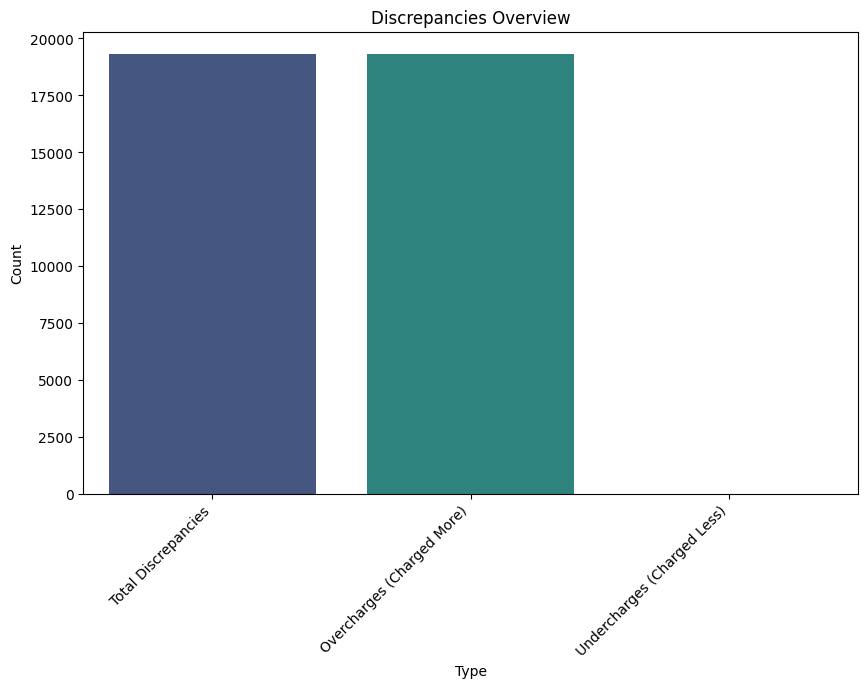

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
data = {
    'Type': ['Total Discrepancies', 'Overcharges (Charged More)', 'Undercharges (Charged Less)'],
    'Count': [total_discrepancies, overcharges_count, undercharges_count]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Count', data=df, palette='viridis')
plt.title('Discrepancies Overview')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


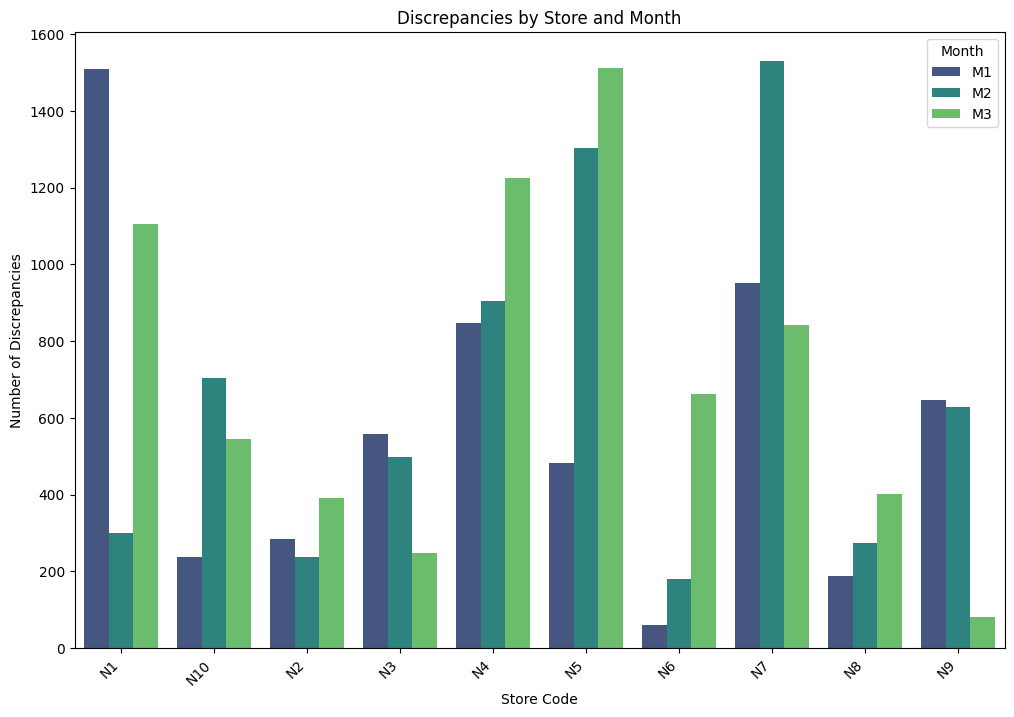

In [14]:
# Create a DataFrame for discrepancies by store and month
discrepancies_by_store_month = working_data[
    (working_data['VALUE'] != working_data['Calculated_Value']) |
    (working_data['VALUE'] != working_data['BILL_AMT'])
].groupby(['STORECODE', 'MONTH']).size().reset_index(name='Discrepancies')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=discrepancies_by_store_month, x='STORECODE', y='Discrepancies', hue='MONTH', palette='viridis')
plt.title('Discrepancies by Store and Month')
plt.ylabel('Number of Discrepancies')
plt.xlabel('Store Code')
plt.legend(title='Month')
plt.xticks(rotation=45, ha='right')
plt.show()


In [34]:
working_data['Calculated_Value'] = working_data['QTY'] * working_data['PRICE']
working_data['Value_Equals_Bill_Amount'] = working_data['VALUE'] == working_data['BILL_AMT']
working_data['Value_Equals_Calculated_Value'] = working_data['VALUE'] == working_data['Calculated_Value']

# Calculate discrepancies
discrepancies = working_data[
    (working_data['VALUE'] != working_data['Calculated_Value']) |
    (working_data['VALUE'] != working_data['BILL_AMT'])
]

# Count discrepancies
total_discrepancies = discrepancies.shape[0]

# Calculate percentage discrepancies
percentage_discrepancies = working_data.groupby(['STORECODE', 'MONTH']).apply(
    lambda x: (x['VALUE'] != x['Calculated_Value']).mean() * 100
).reset_index(name='Percentage')

# Rename columns for clarity
percentage_discrepancies.rename(columns={'STORECODE': 'Store Code', 'MONTH': 'Month'}, inplace=True)

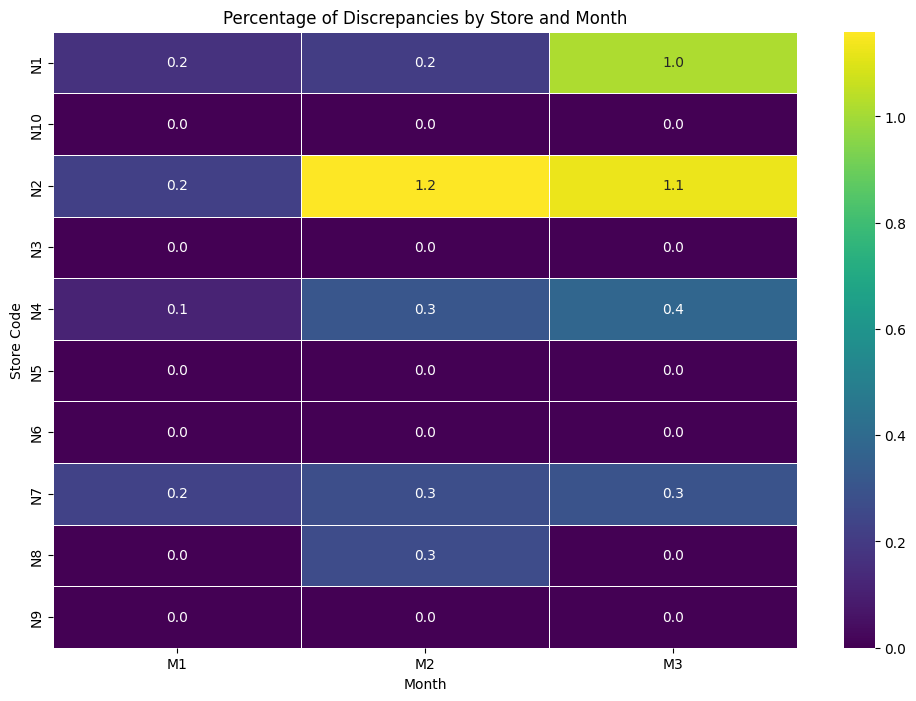

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot for heatmap
heatmap_data = percentage_discrepancies.pivot(index='Store Code', columns='Month', values='Percentage')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".1f", linewidths=0.5)
plt.title('Percentage of Discrepancies by Store and Month')
plt.xlabel('Month')
plt.ylabel('Store Code')
plt.show()


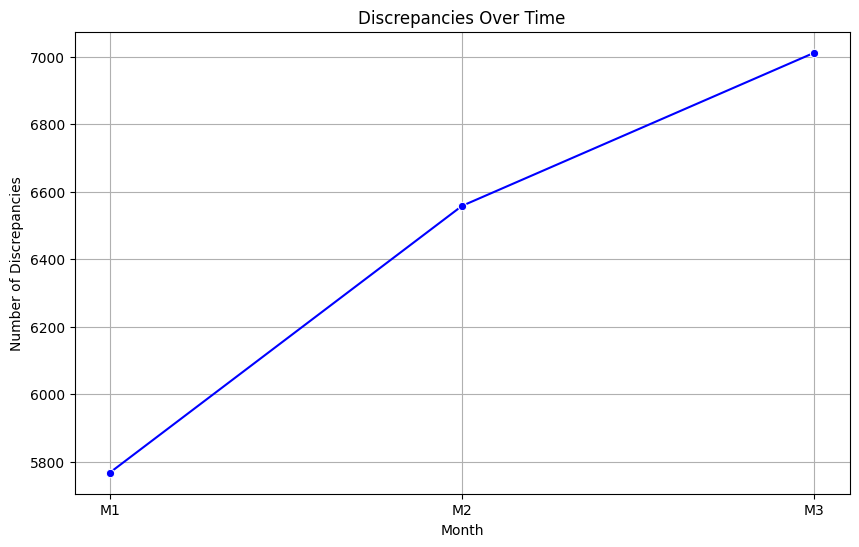

In [17]:
# Group by month and calculate discrepancies
discrepancies_over_time = working_data[
    (working_data['VALUE'] != working_data['Calculated_Value']) |
    (working_data['VALUE'] != working_data['BILL_AMT'])
].groupby('MONTH').size().reset_index(name='Discrepancies')

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=discrepancies_over_time, x='MONTH', y='Discrepancies', marker='o', color='blue')
plt.title('Discrepancies Over Time')
plt.ylabel('Number of Discrepancies')
plt.xlabel('Month')
plt.grid(True)
plt.show()


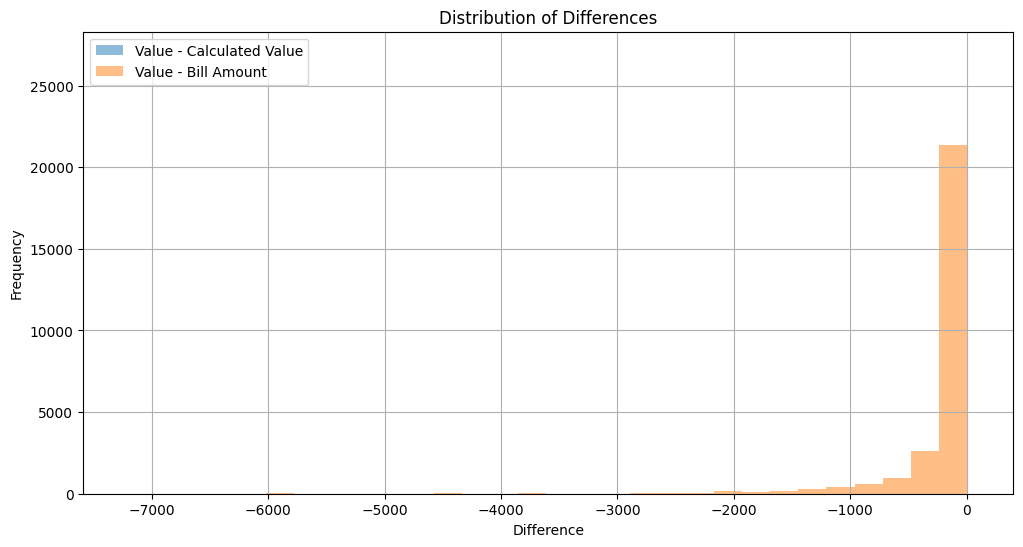

In [18]:
# Calculate differences
working_data['Difference_Value_Calculated'] = working_data['VALUE'] - working_data['Calculated_Value']
working_data['Difference_Value_Bill_Amount'] = working_data['VALUE'] - working_data['BILL_AMT']

# Plot
plt.figure(figsize=(12, 6))
plt.hist(working_data['Difference_Value_Calculated'], bins=30, alpha=0.5, label='Value - Calculated Value')
plt.hist(working_data['Difference_Value_Bill_Amount'], bins=30, alpha=0.5, label='Value - Bill Amount')
plt.title('Distribution of Differences')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


# **Summary**
**Bar Chart**: Displays the count of discrepancies, overcharges, and undercharges.
**Bar Plot by Store and Month:** Helps identify discrepancies across different stores and months.

**Heatmap**: Visualizes the percentage of discrepancies by store and month.
**Line Plot**: Shows the trend of discrepancies over time.

Histogram: **bold text** Examines the distribution of differences between VALUE and Calculated_Value or BILL_AMT.


<ipython-input-19-28d09a190bb9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STORECODE', y='BILL_AMT', data=total_sales_sorted, palette='viridis')


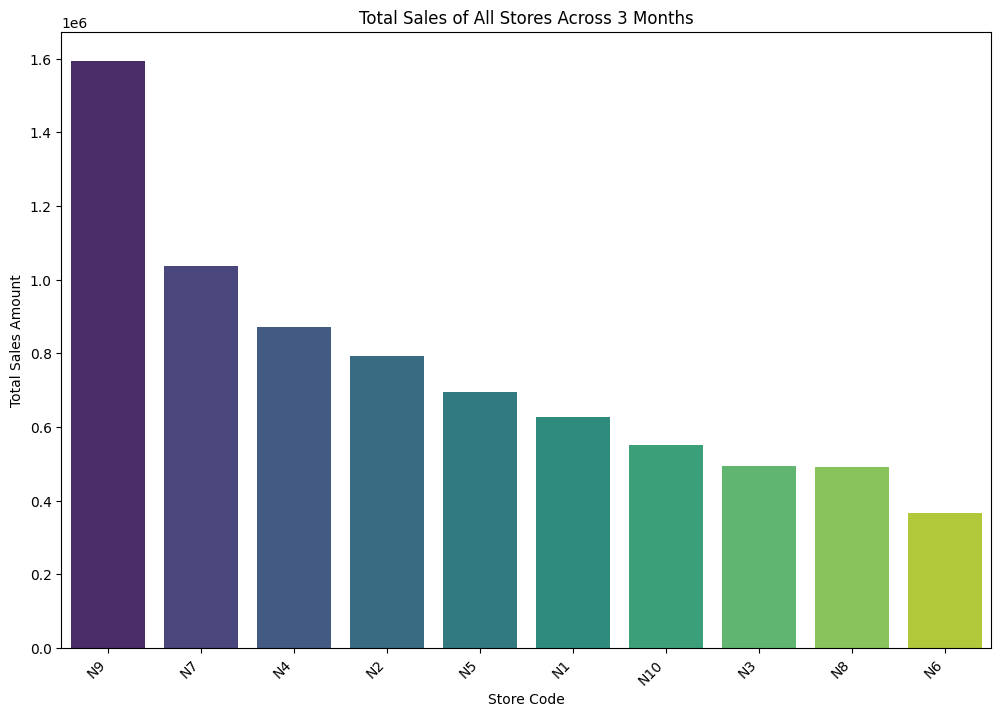

In [19]:
# Calculate total sales per store across all months
total_sales = working_data.groupby('STORECODE')['BILL_AMT'].sum().reset_index()

# Sort the DataFrame by total sales in descending order for better visualization
total_sales_sorted = total_sales.sort_values(by='BILL_AMT', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='STORECODE', y='BILL_AMT', data=total_sales_sorted, palette='viridis')
plt.title('Total Sales of All Stores Across 3 Months')
plt.xlabel('Store Code')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-20-b797e8bb31f6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MONTH', y='BILL_AMT', data=monthly_sales, palette='viridis')


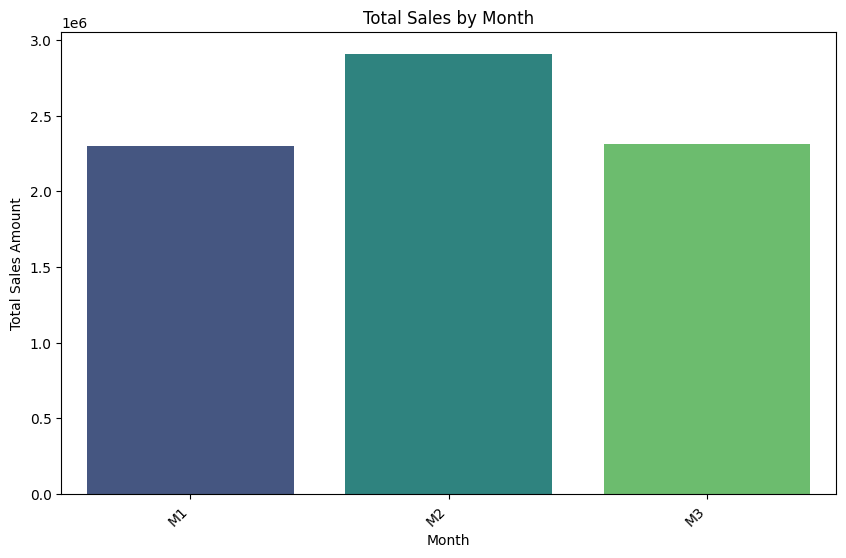

In [20]:

# Calculate total sales per month
monthly_sales = working_data.groupby('MONTH')['BILL_AMT'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='MONTH', y='BILL_AMT', data=monthly_sales, palette='viridis')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x800 with 0 Axes>

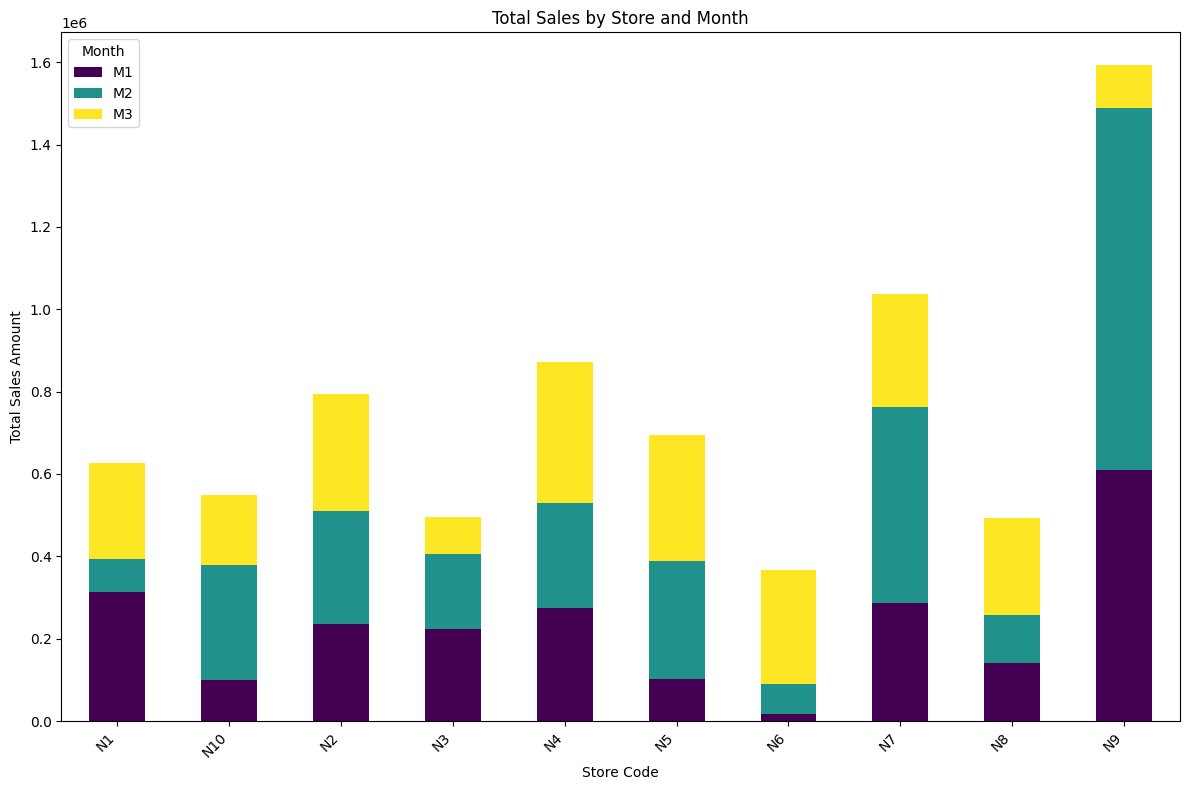

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming working_data is already loaded

# Calculate total sales per store and month
store_monthly_sales = working_data.groupby(['STORECODE', 'MONTH'])['BILL_AMT'].sum().reset_index()

# Pivot the data for easier plotting
pivot_sales = store_monthly_sales.pivot(index='STORECODE', columns='MONTH', values='BILL_AMT')

# Plot
plt.figure(figsize=(12, 8))
pivot_sales.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
plt.title('Total Sales by Store and Month')
plt.xlabel('Store Code')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')
plt.tight_layout()
plt.show()


<ipython-input-22-414c43cd31e8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BILL_AMT', y='GRP', data=top_groups, palette='viridis')


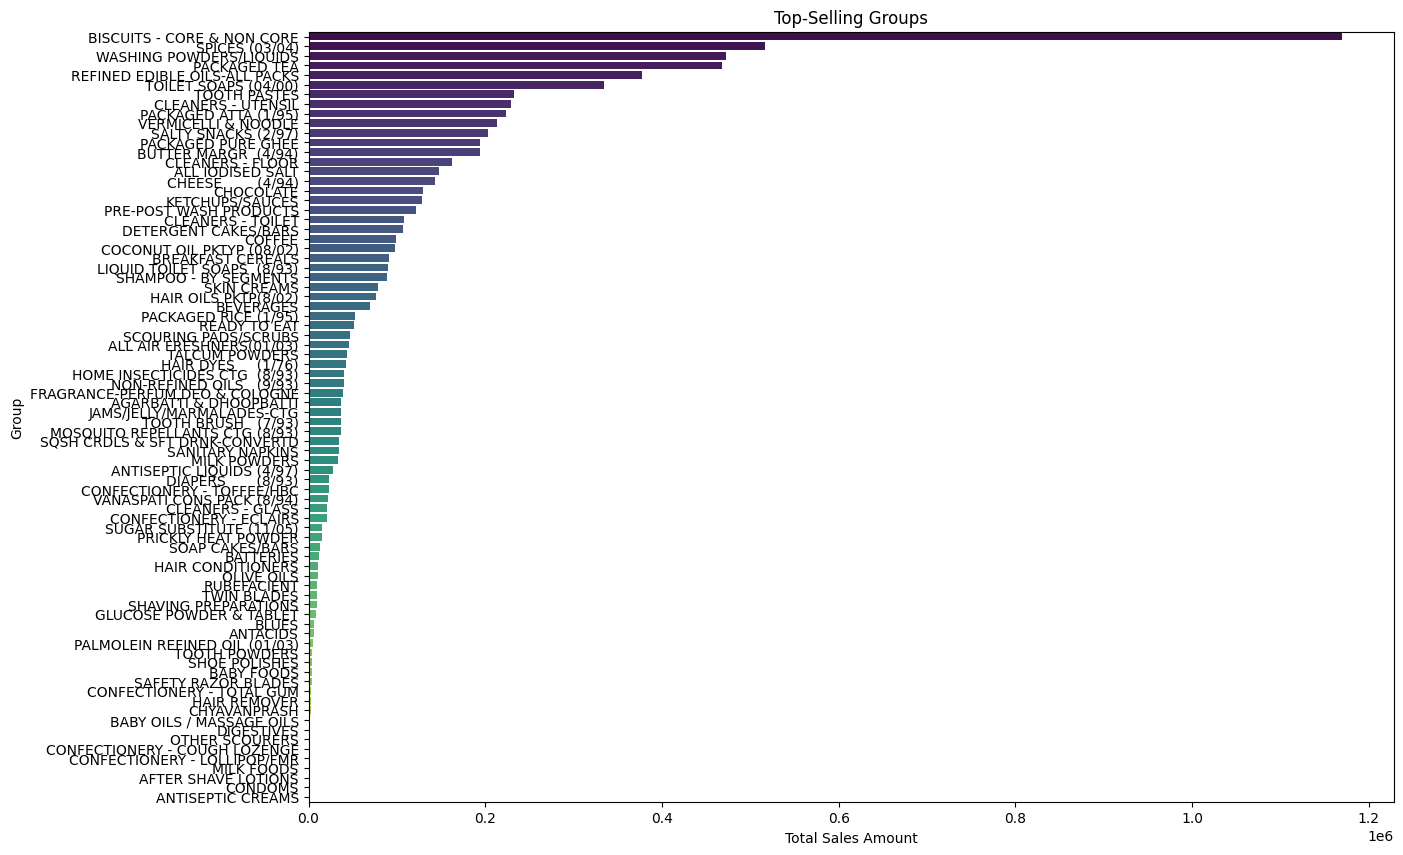

In [22]:

# Calculate total sales per group
group_sales = working_data.groupby('GRP')['BILL_AMT'].sum().reset_index()

# Sort the groups by total sales in descending order
top_groups = group_sales.sort_values(by='BILL_AMT', ascending=False)

# Plot
plt.figure(figsize=(14,10))
sns.barplot(x='BILL_AMT', y='GRP', data=top_groups, palette='viridis')
plt.title('Top-Selling Groups')
plt.xlabel('Total Sales Amount')
plt.ylabel('Group')
plt.show()

<ipython-input-23-fcae3f27f084>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BILL_AMT', y='GRP', data=top_20_groups, palette='viridis')


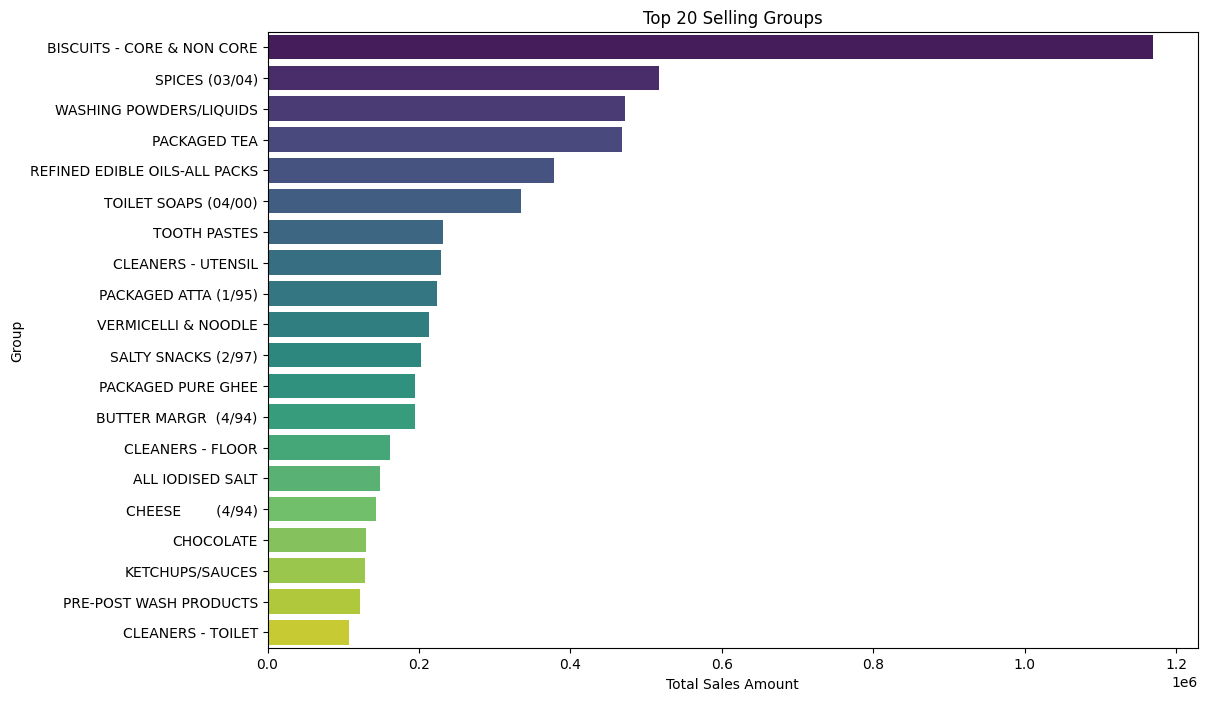

In [23]:


# Calculate total sales per group
group_sales = working_data.groupby('GRP')['BILL_AMT'].sum().reset_index()

# Sort the groups by total sales in descending order
top_groups = group_sales.sort_values(by='BILL_AMT', ascending=False)

# Select the top 20 groups
top_20_groups = top_groups.head(20)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='BILL_AMT', y='GRP', data=top_20_groups, palette='viridis')
plt.title('Top 20 Selling Groups')
plt.xlabel('Total Sales Amount')
plt.ylabel('Group')
plt.show()


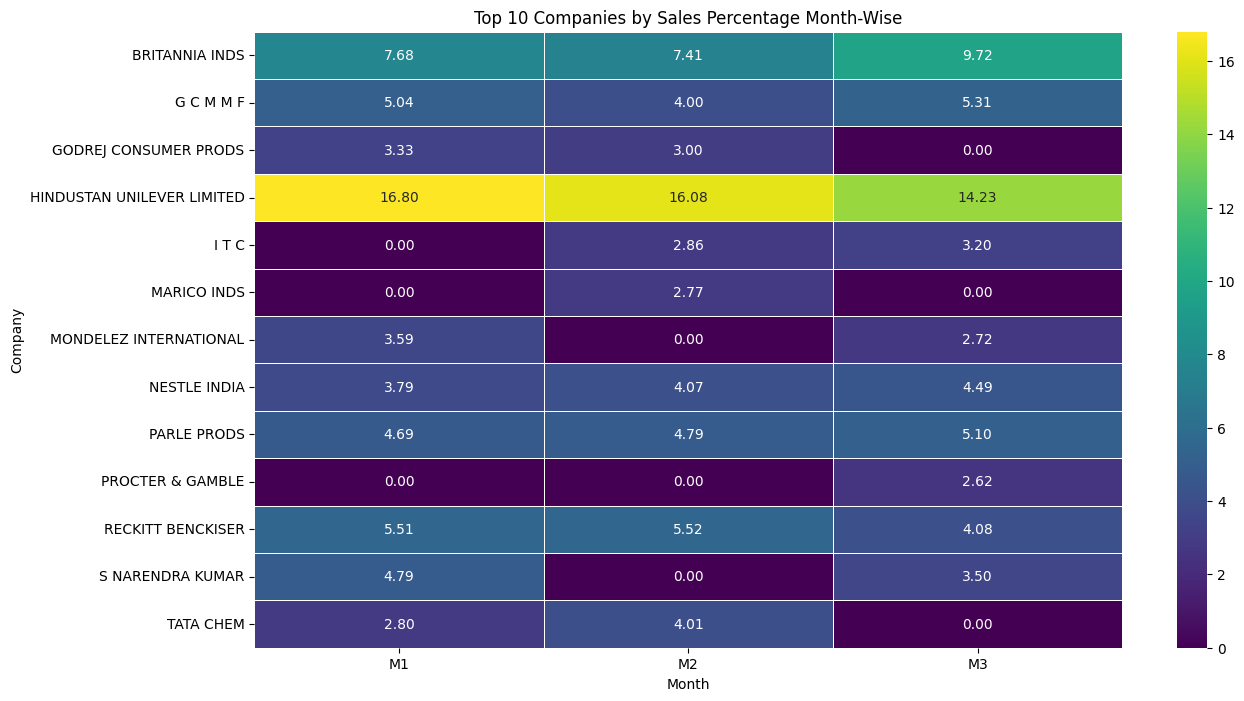

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming working_data is already loaded

# Calculate total sales per company and month
company_monthly_sales = working_data.groupby(['CMP', 'MONTH'])['BILL_AMT'].sum().reset_index()

# Calculate total sales per month
total_sales_per_month = company_monthly_sales.groupby('MONTH')['BILL_AMT'].sum().reset_index()
total_sales_per_month.rename(columns={'BILL_AMT': 'TOTAL_SALES'}, inplace=True)

# Merge total sales back into the company data
company_sales = pd.merge(company_monthly_sales, total_sales_per_month, on='MONTH')

# Calculate percentage
company_sales['PERCENTAGE'] = (company_sales['BILL_AMT'] / company_sales['TOTAL_SALES']) * 100

# Get top 10 companies for each month by percentage
top_companies_monthly = company_sales.groupby('MONTH').apply(
    lambda x: x.sort_values(by='PERCENTAGE', ascending=False).head(10)
).reset_index(drop=True)

# Pivot the data for easier plotting
pivot_top_companies = top_companies_monthly.pivot_table(index='CMP', columns='MONTH', values='PERCENTAGE', fill_value=0)

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_top_companies, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Top 10 Companies by Sales Percentage Month-Wise')
plt.xlabel('Month')
plt.ylabel('Company')
plt.show()


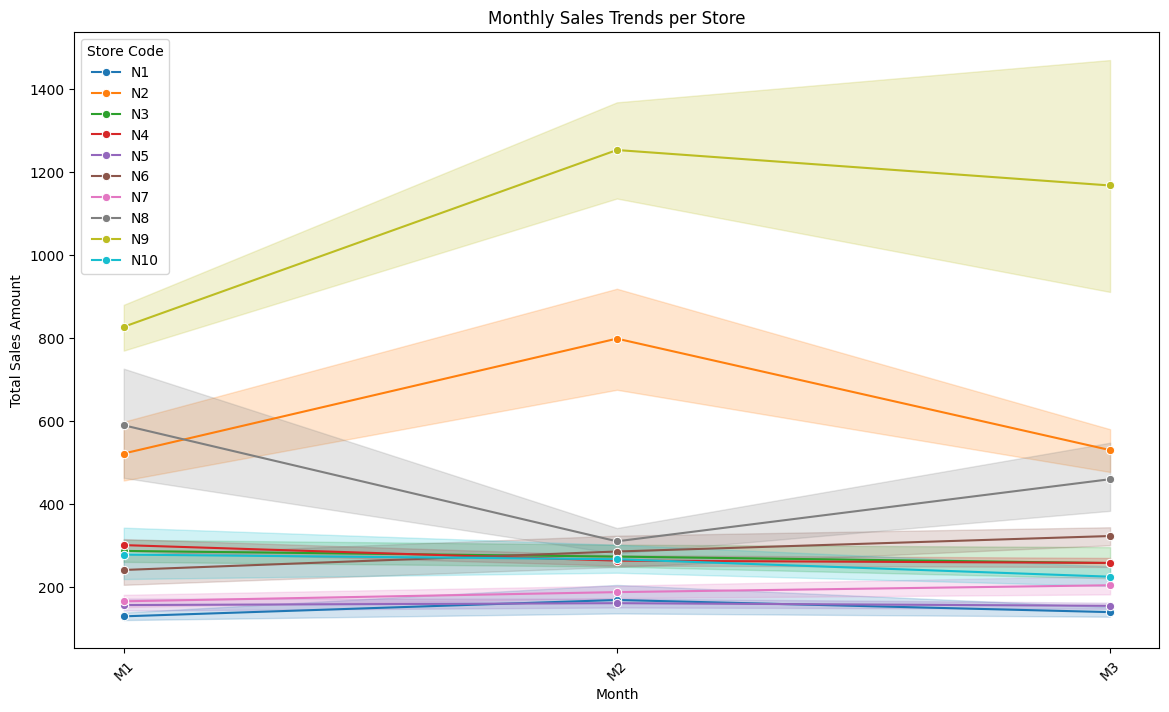

In [25]:
# Monthly Sales Trends per Store
plt.figure(figsize=(14, 8))
sns.lineplot(data=working_data, x='MONTH', y='BILL_AMT', hue='STORECODE', marker='o')
plt.title('Monthly Sales Trends per Store')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Store Code')
plt.xticks(rotation=45)
plt.show()


# Sales vs qty

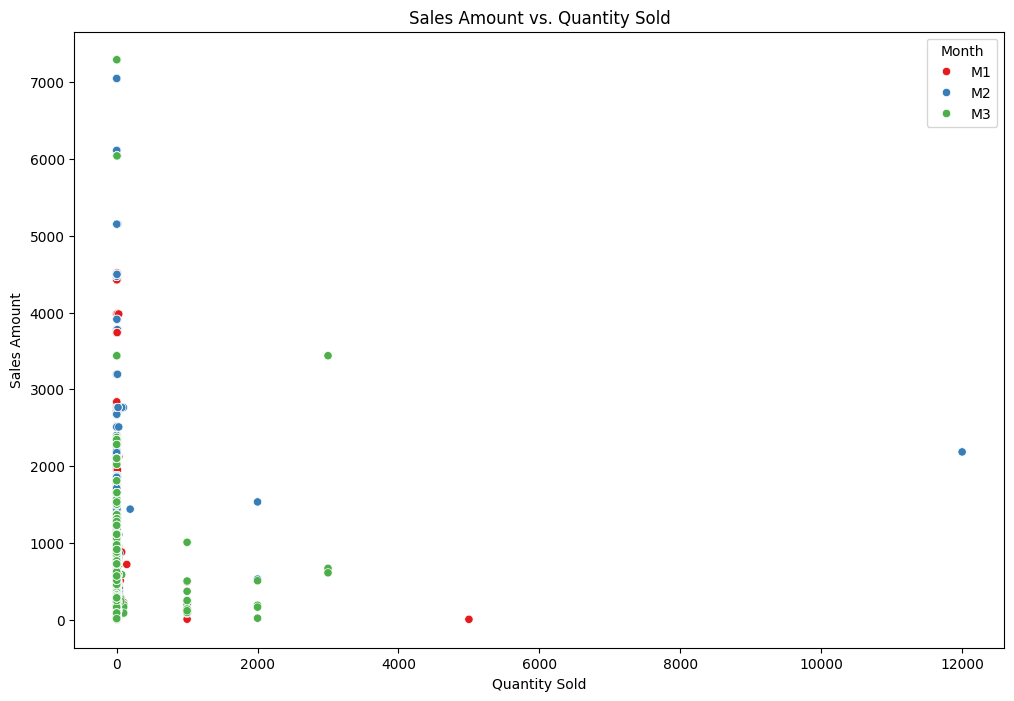

In [26]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=working_data, x='QTY', y='BILL_AMT', hue='MONTH', palette='Set1')
plt.title('Sales Amount vs. Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount')
plt.legend(title='Month')
plt.show()

<ipython-input-27-d05affa6c60e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_day, x='DAY', y='BILL_AMT', palette='magma')


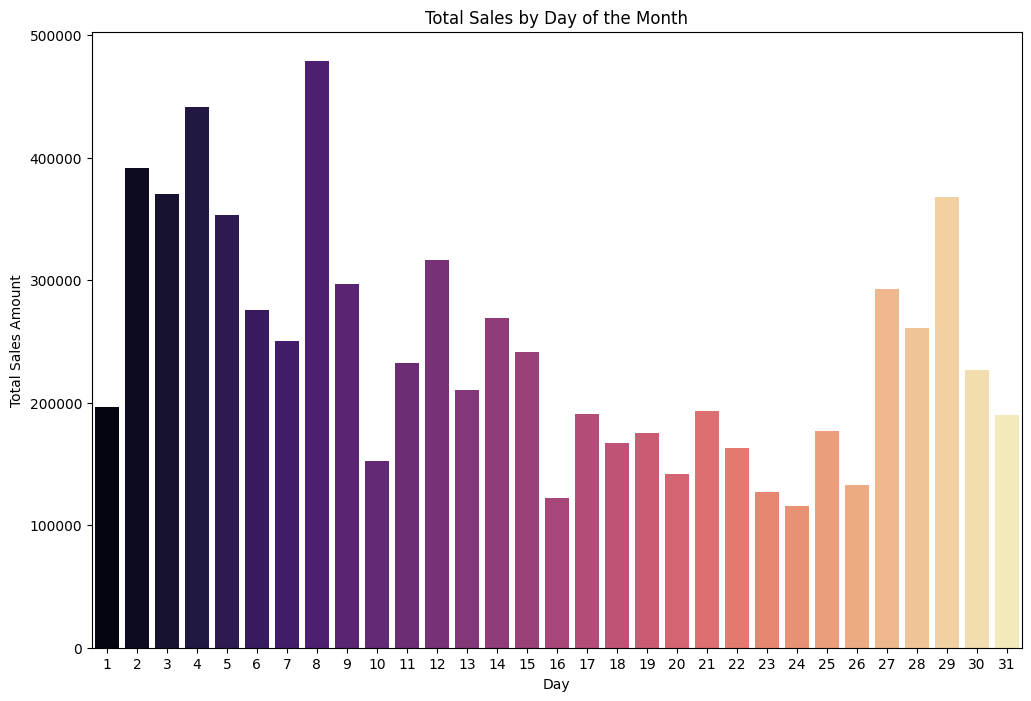

In [27]:
#  Sales by Day of the Month
plt.figure(figsize=(12, 8))
sales_by_day = working_data.groupby('DAY')['BILL_AMT'].sum().reset_index()
sns.barplot(data=sales_by_day, x='DAY', y='BILL_AMT', palette='magma')
plt.title('Total Sales by Day of the Month')
plt.xlabel('Day')
plt.ylabel('Total Sales Amount')
plt.show()


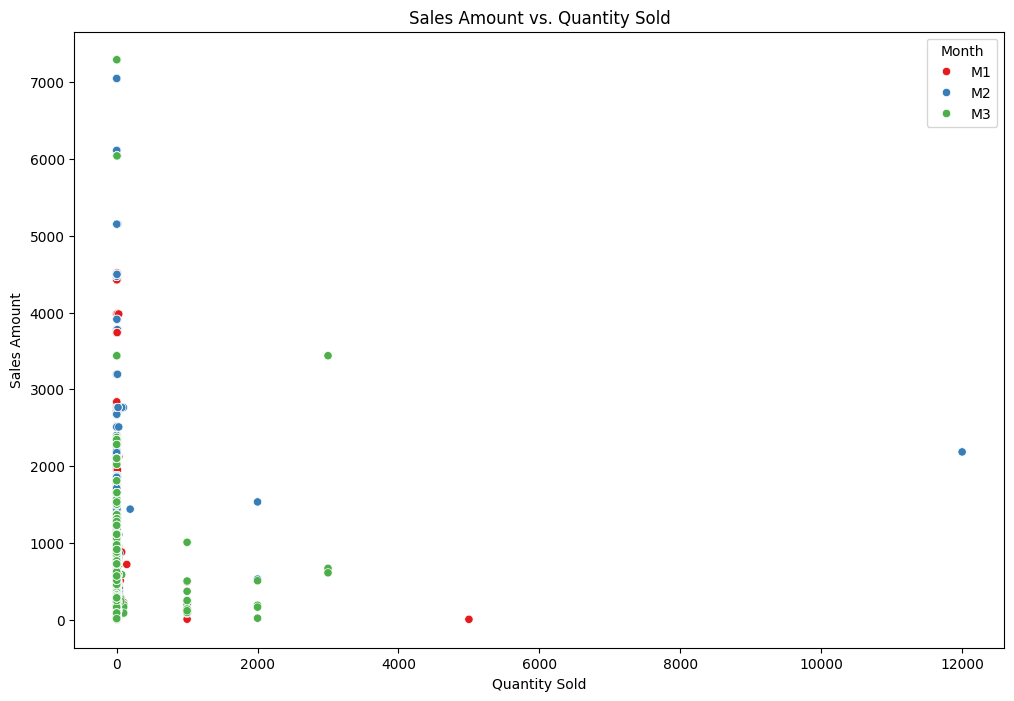

In [28]:
# Sales and qutanty relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(data=working_data, x='QTY', y='BILL_AMT', hue='MONTH', palette='Set1')
plt.title('Sales Amount vs. Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount')
plt.legend(title='Month')
plt.show()


In [29]:
import pandas as pd

# Group by 'GRP' (Group) and sum the 'VALUE' (Sales Value)
top_categories = working_data.groupby('GRP')['VALUE'].sum().nlargest(10).index

# Filter the DataFrame to include only the top ten categories
top_data = working_data[working_data['GRP'].isin(top_categories)]


In [30]:
# Create a dictionary to hold the top sub-categories and sub-sub-categories
category_mapping = {}

# Loop through top categories to find top sub-categories and sub-sub-categories
for category in top_categories:
    category_data = top_data[top_data['GRP'] == category]

    # Get top three sub-categories
    top_sub_categories = category_data.groupby('SGRP')['VALUE'].sum().nlargest(3).index

    category_mapping[category] = {}

    for sub_category in top_sub_categories:
        sub_category_data = category_data[category_data['SGRP'] == sub_category]

        # Get top three sub-sub-categories
        top_sub_sub_categories = sub_category_data.groupby('SSGRP')['VALUE'].sum().nlargest(3).index

        category_mapping[category][sub_category] = list(top_sub_sub_categories)


In [31]:
import plotly.graph_objects as go

# Flatten the hierarchical structure for plotting
labels = []
parents = []
values = []

# Add top categories
for category in category_mapping:
    labels.append(category)
    parents.append('')
    values.append(0)  # Placeholder value for visualization

    # Add top sub-categories
    for sub_category in category_mapping[category]:
        labels.append(sub_category)
        parents.append(category)
        values.append(0)  # Placeholder value for visualization

        # Add top sub-sub-categories
        for sub_sub_category in category_mapping[category][sub_category]:
            labels.append(sub_sub_category)
            parents.append(sub_category)
            values.append(1)  # Placeholder value for visualization

# Create the Sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",
    textinfo="label+value"
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()


In [32]:
import pprint
pprint.pprint(category_mapping)

{'BISCUITS - CORE & NON CORE': {'CREAM': ['CREAM'],
                                'MARIE': ['MARIE'],
                                'SWEET/COOKIES': ['SWEET/COOKIES']},
 'BUTTER MARGR  (4/94)': {'BUTTER': ['SALTED'], 'MARGARINE': ['MARGARINE']},
 'PACKAGED ATTA (1/95)': {'ATTA': ['ATTA'],
                          'MAIDA': ['MAIDA'],
                          'SOOJI': ['SOOJI']},
 'PACKAGED PURE GHEE': {'PACKAGED PURE GHEE': ['PACKAGED PURE GHEE']},
 'PACKAGED TEA': {'MAIN PACKS': ['MAIN PACKS']},
 'REFINED EDIBLE OILS-ALL PACKS': {'BLENDED OIL': ['BLENDED OIL'],
                                   'RICE BRAN': ['RICE BRAN'],
                                   'SUN FLOWER': ['SUN FLOWER']},
 'SPICES (03/04)': {'BLENDED': ['PICKLE POWDER-OTHER MASALA',
                                'CHICKEN MASALA-NON VEG MASALA',
                                'GARAM MASALA-BASIC MASALA'],
                    'PURE': ['ASOFOETIDA/HING-PURE MASALA',
                             'CHILLY POWDER-PURE